In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import pycaret as pc

In [5]:
import sklearn as sk

In [6]:
from pycaret.nlp import *

In [7]:
np.__version__

'1.22.3'

In [8]:
pd.__version__

'1.3.5'

In [9]:
pc.__version__

'2.3.10'

In [10]:
sk.__version__

'0.23.2'

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
data = pd.read_csv("./kiva.csv", sep=',', decimal='.', verbose= True, engine='c') 

Tokenization took: 21.84 ms
Type conversion took: 28.86 ms
Parser memory cleanup took: 0.00 ms


In [13]:
data.shape

(6818, 7)

In [14]:
data.head()

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [15]:
data = data.sample(1000, random_state=786).reset_index(drop=True)

In [16]:
data.shape

(1000, 7)

In [17]:
exp_nlp101 = setup(data = data, 
                   target = 'en', 
                   custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                       'child', 'school'],
                   session_id = 101,
                   log_experiment = True,
                   experiment_name = 'EX001')

Description,Value
session_id,101
Documents,1000
Vocab Size,4636
Custom Stopwords,True


### [Evaluate Topic Models: Latent Dirichlet Allocation (LDA)](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)

### [Evaluating Topic Models](https://www.youtube.com/watch?v=UkmIljRIG_M)

### [Latent Dirichlet Allocation](https://radimrehurek.com/gensim/models/ldamodel.html)

In [18]:
lda = create_model('nmf', num_topics = 4, multi_core = True)

In [19]:
print(lda)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=4, random_state=101, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)


In [20]:
lda_results = assign_model(lda)

In [21]:
lda_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry primary train tailor operate sma...,F,75,partner,Services,0,0.027596,0.005362,0.003764,0.006882,Topic 0,0.63
1,Kenya,gynaecology practitioner run live wife biologi...,M,1200,partner,Health,0,0.015862,0.003528,0.006168,0.010608,Topic 0,0.44
2,Dominican Republic,live boy girl range new use clothing support f...,F,150,partner,Clothing,0,0.036466,0.001185,0.030735,0.000000,Topic 0,0.53
3,Kenya,phanice marry daughter secondary boy primary f...,F,150,lender,Services,1,0.033217,0.000000,0.000000,0.000000,Topic 0,1.00
4,Kenya,hotel last get good return competition increas...,F,300,lender,Food,1,0.017980,0.012159,0.000333,0.003836,Topic 0,0.52


In [22]:
plot_model()

In [23]:
plot_model(plot = 'bigram')

In [24]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

In [25]:
plot_model(lda, plot = 'topic_distribution')

In [26]:
plot_model(lda, plot = 'tsne')

### [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://umap-learn.readthedocs.io/en/latest/index.html)

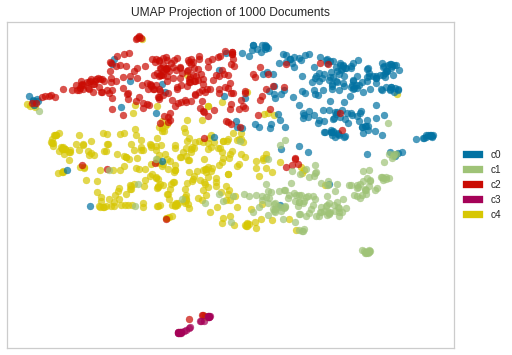

In [27]:
plot_model(lda, plot = 'umap')

In [28]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [29]:
save_model(lda,'./models/NLP01')

Model Succesfully Saved


(NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
     n_components=4, random_state=101, shuffle=False, solver='cd', tol=0.0001,
     verbose=0),
 './models/NLP01.pkl')

In [30]:
saved_lda = load_model('./models/NLP01')

Model Sucessfully Loaded


In [31]:
print(saved_lda)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=4, random_state=101, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)


In [32]:
!mlflow ui 

[2022-04-17 20:19:42 -0300] [39284] [INFO] Starting gunicorn 20.1.0
[2022-04-17 20:19:42 -0300] [39284] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2022-04-17 20:19:42 -0300] [39284] [ERROR] Retrying in 1 second.
[2022-04-17 20:19:43 -0300] [39284] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2022-04-17 20:19:43 -0300] [39284] [ERROR] Retrying in 1 second.
[2022-04-17 20:19:44 -0300] [39284] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2022-04-17 20:19:44 -0300] [39284] [ERROR] Retrying in 1 second.
[2022-04-17 20:19:45 -0300] [39284] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2022-04-17 20:19:45 -0300] [39284] [ERROR] Retrying in 1 second.
[2022-04-17 20:19:46 -0300] [39284] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2022-04-17 20:19:46 -0300] [39284] [ERROR] Retrying in 1 second.
[2022-04-17 20:19:47 -0300] [39284] [ERROR] Can't connect to ('127.0.0.1', 5000)
Running the mlflow server failed. Please see the logs above for details.


________________________________